In [2]:
library(tidyverse)
library(ggplot2)
install.packages("pryr", repos = "http://cran.us.r-project.org")
install.packages("corrplot", repos = "http://cran.us.r-project.org")
library(pryr)
library(repr)
library(corrplot)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Warning message in install.packages("pryr", repos = "http://cran.us.r-project.org"):
“installation of package ‘pryr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial

corrplot 0.84 loaded


In [45]:
AbDataURL <- "http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [71]:
AbData <- read.csv(url(AbDataURL), sep = ",", header = FALSE)

In [72]:
AbData1 <- AbData %>% rename(Sex = V1, Length = V2, Diameter = V3, Height = V4, Whole = V5, Shucked= V6, Viscera = V7, Shell = V8, Rings = V9)

In [73]:
dim(AbData1)

[1] 4177    9

In [74]:
as_tibble(AbData1)

Sex,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [75]:
object_size(AbData1)

269 kB

In [76]:
sum(is.na(AbData1))

[1] 0

In [54]:
AbData$Sex = NULL

In [55]:
summary(AbData)

     Length         Diameter          Height           Whole       
 Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   :0.0020  
 1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.:0.4415  
 Median :0.545   Median :0.4250   Median :0.1400   Median :0.7995  
 Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :0.8287  
 3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:1.1530  
 Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :2.8255  
    Shucked          Viscera           Shell            Rings       
 Min.   :0.0010   Min.   :0.0005   Min.   :0.0015   Min.   : 1.000  
 1st Qu.:0.1860   1st Qu.:0.0935   1st Qu.:0.1300   1st Qu.: 8.000  
 Median :0.3360   Median :0.1710   Median :0.2340   Median : 9.000  
 Mean   :0.3594   Mean   :0.1806   Mean   :0.2388   Mean   : 9.934  
 3rd Qu.:0.5020   3rd Qu.:0.2530   3rd Qu.:0.3290   3rd Qu.:11.000  
 Max.   :1.4880   Max.   :0.7600   Max.   :1.0050   Max.   :29.000  

In [56]:
cor(AbData)

,Length,Diameter,Height,Whole,Shucked,Viscera,Shell,Rings
Length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056,0.5567196
Diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298,0.5746599
Height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380,0.5574673
Whole,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554,0.5403897
Shucked,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171,0.4208837
Viscera,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563,0.5038192
Shell,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000,0.6275740
Rings,0.5567196,0.5746599,0.5574673,0.5403897,0.4208837,0.5038192,0.6275740,1.0000000


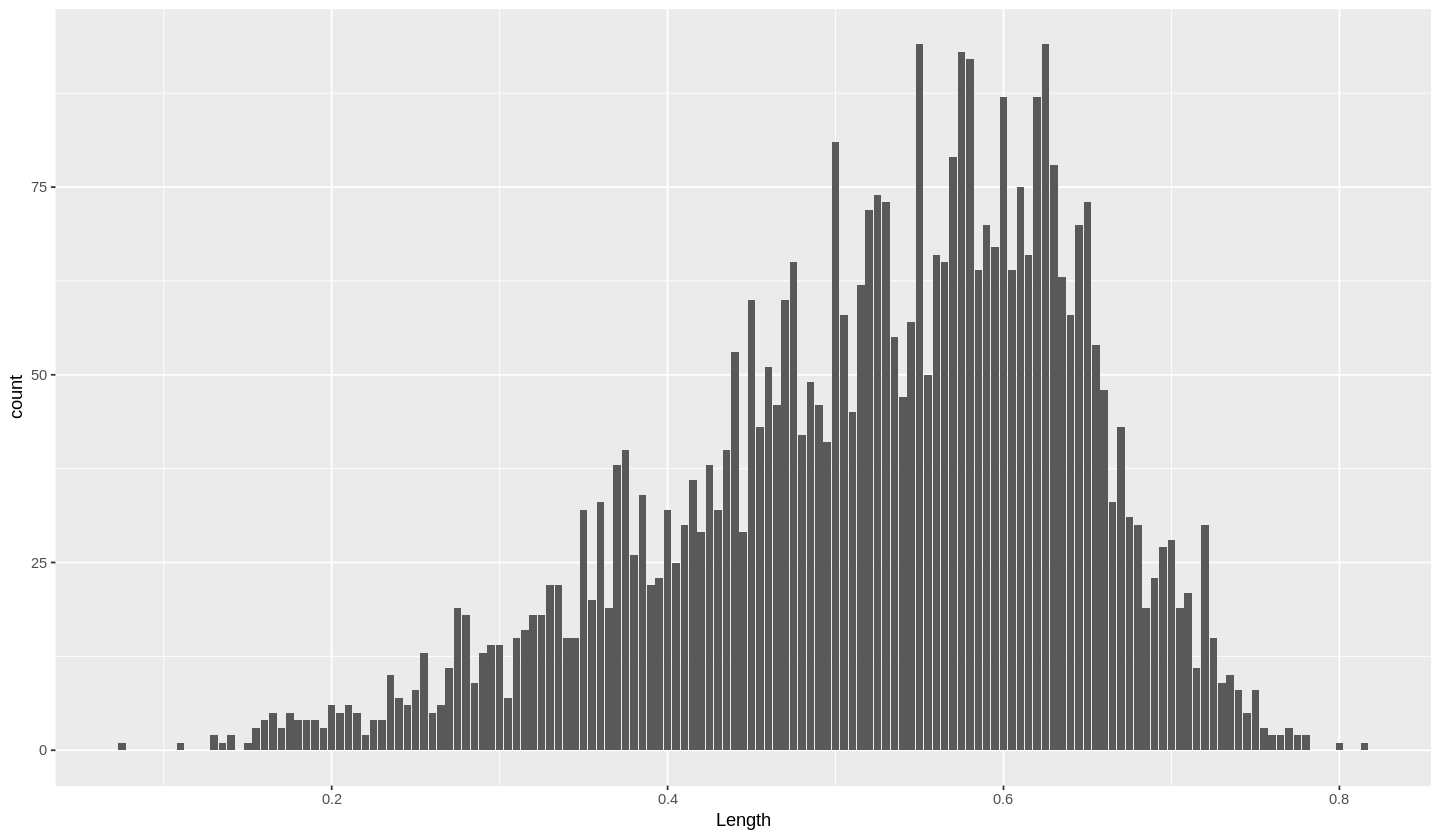

In [86]:
ggplot(AbData1, aes(x = Length)) + geom_bar()

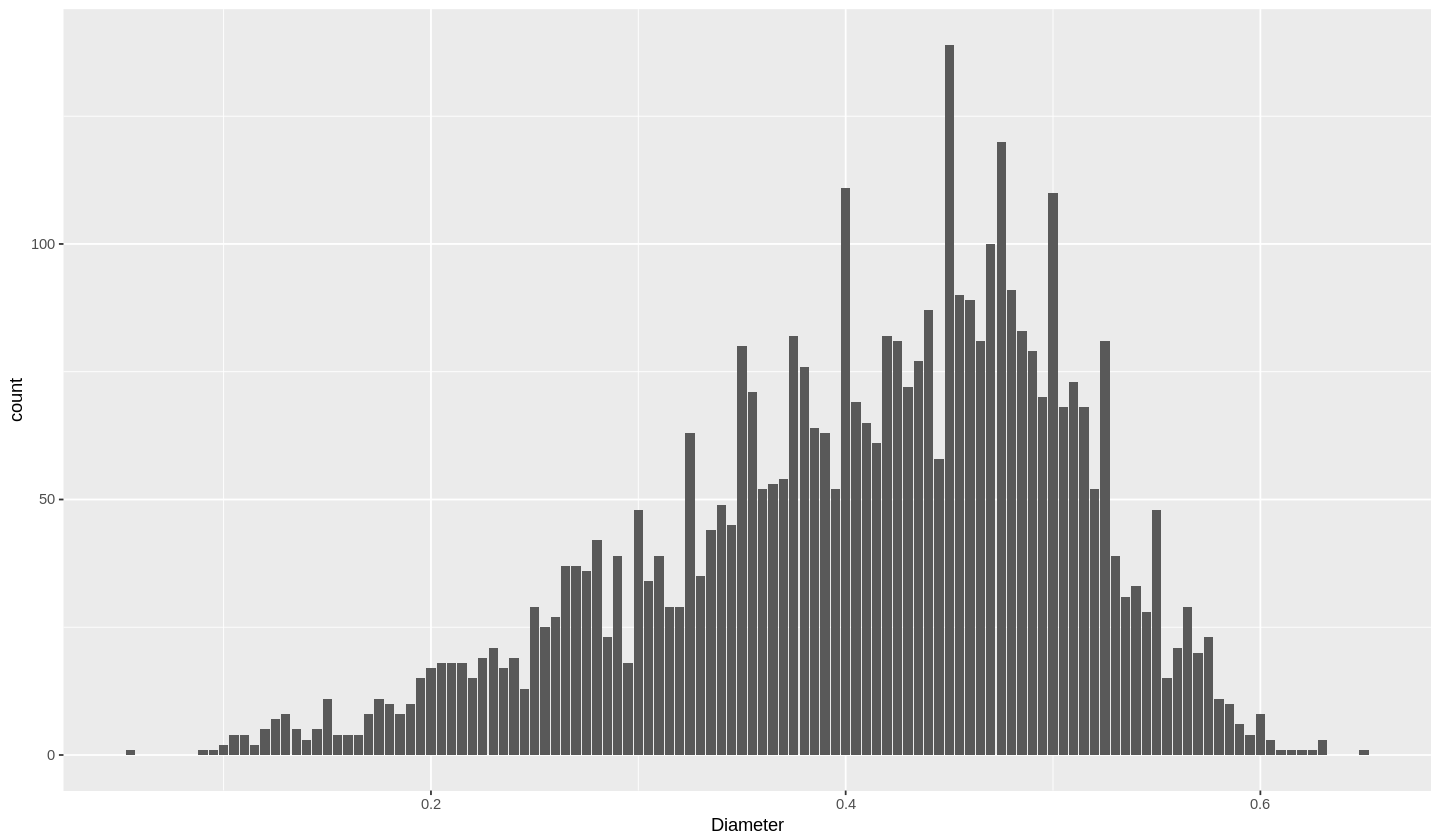

In [87]:
ggplot(AbData1, aes(x = Diameter)) + geom_bar()

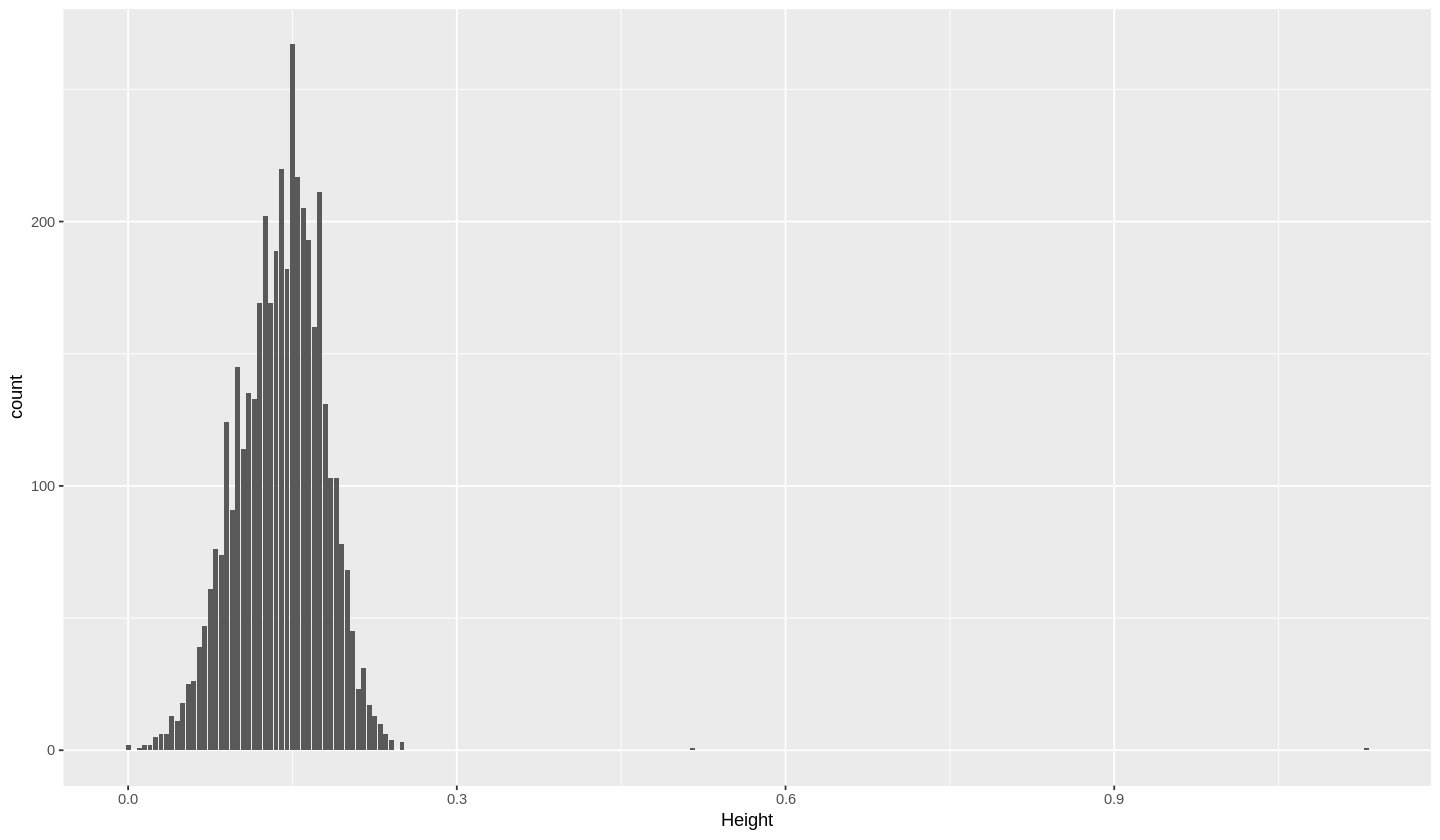

In [88]:
ggplot(AbData1, aes(x = Height)) + geom_bar()

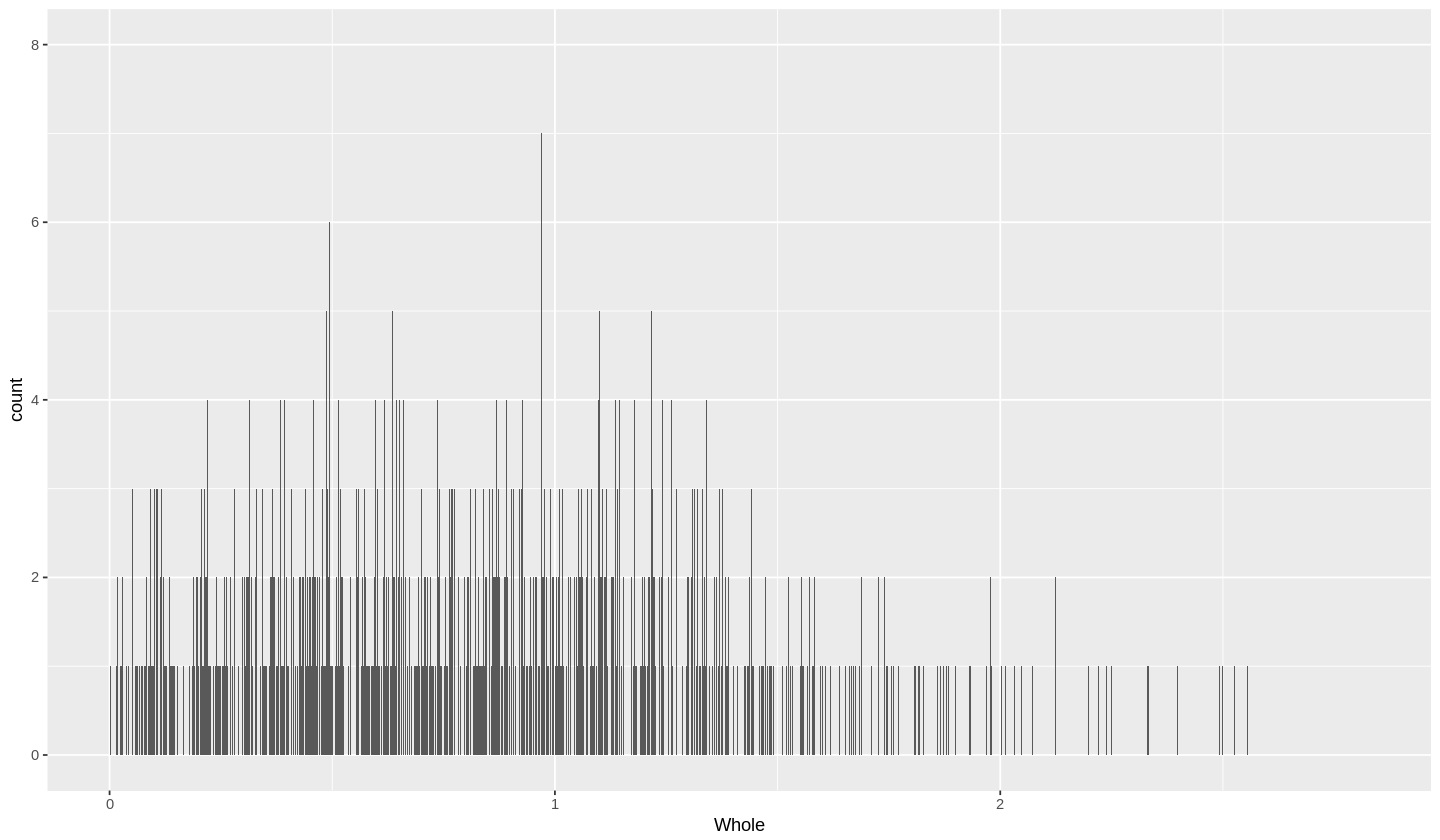

In [90]:
ggplot(AbData1, aes(x = Whole)) + geom_bar()

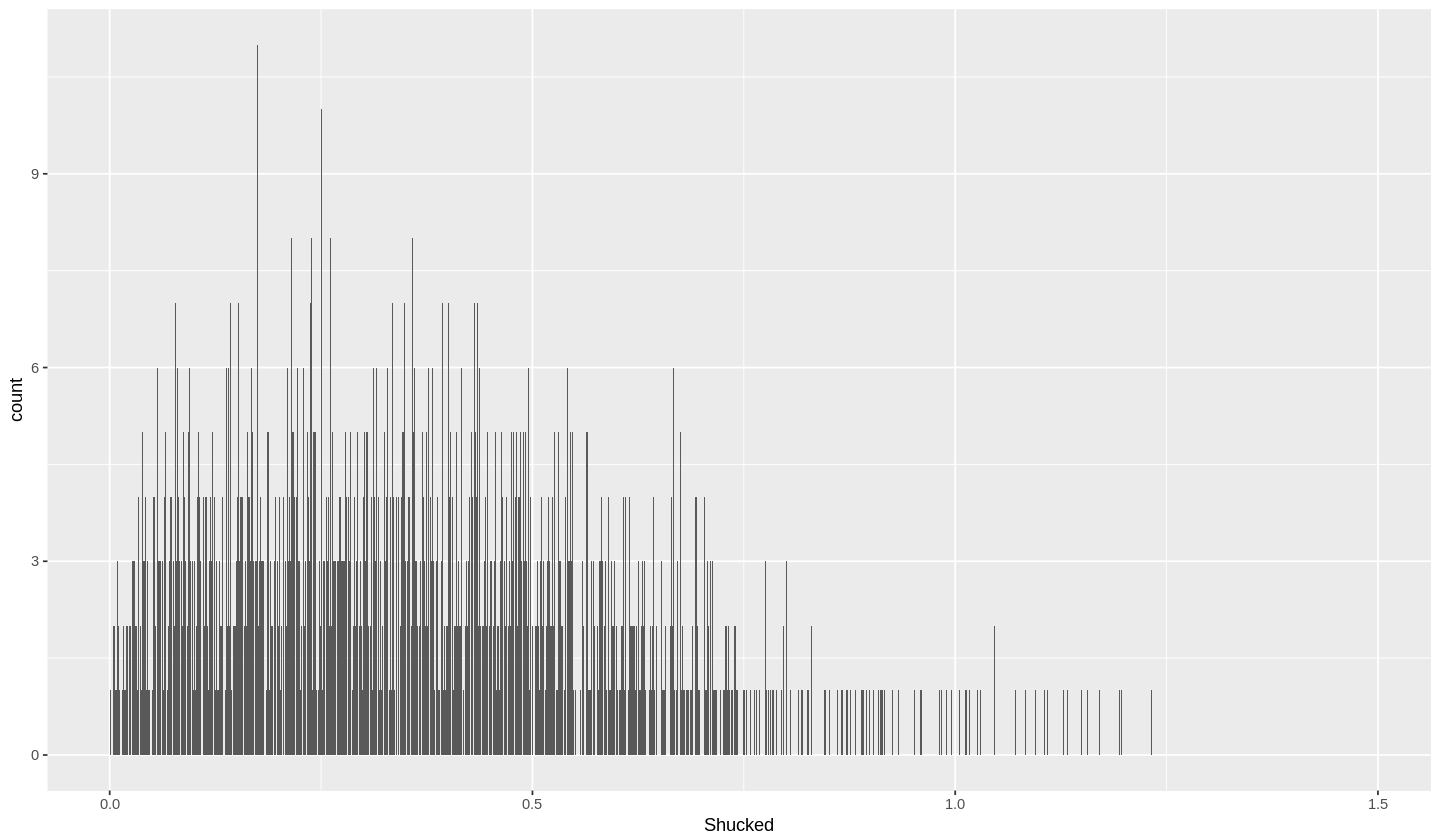

In [91]:
ggplot(AbData1, aes(x = Shucked)) + geom_bar()

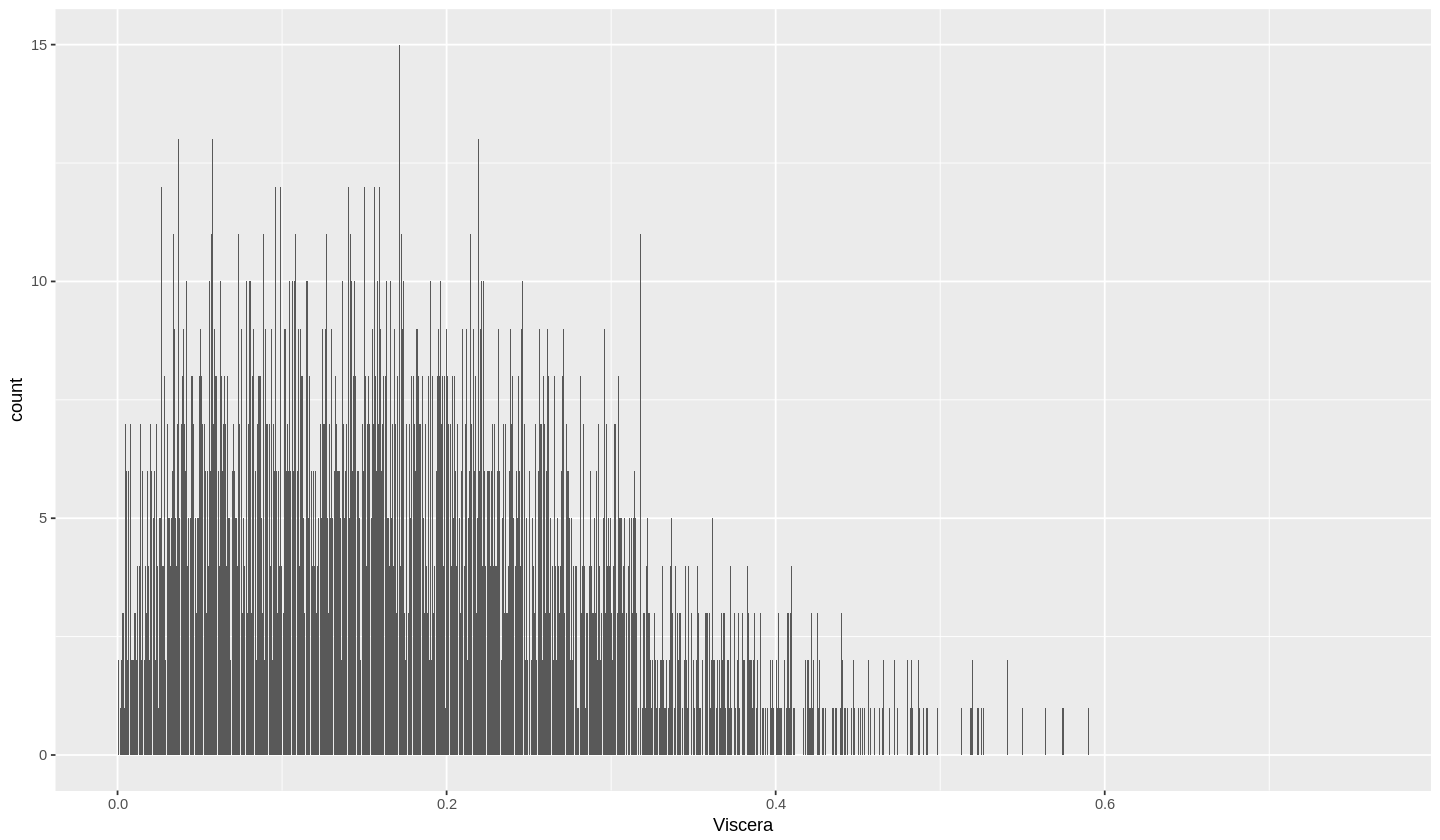

In [92]:
ggplot(AbData1, aes(x = Viscera)) + geom_bar()

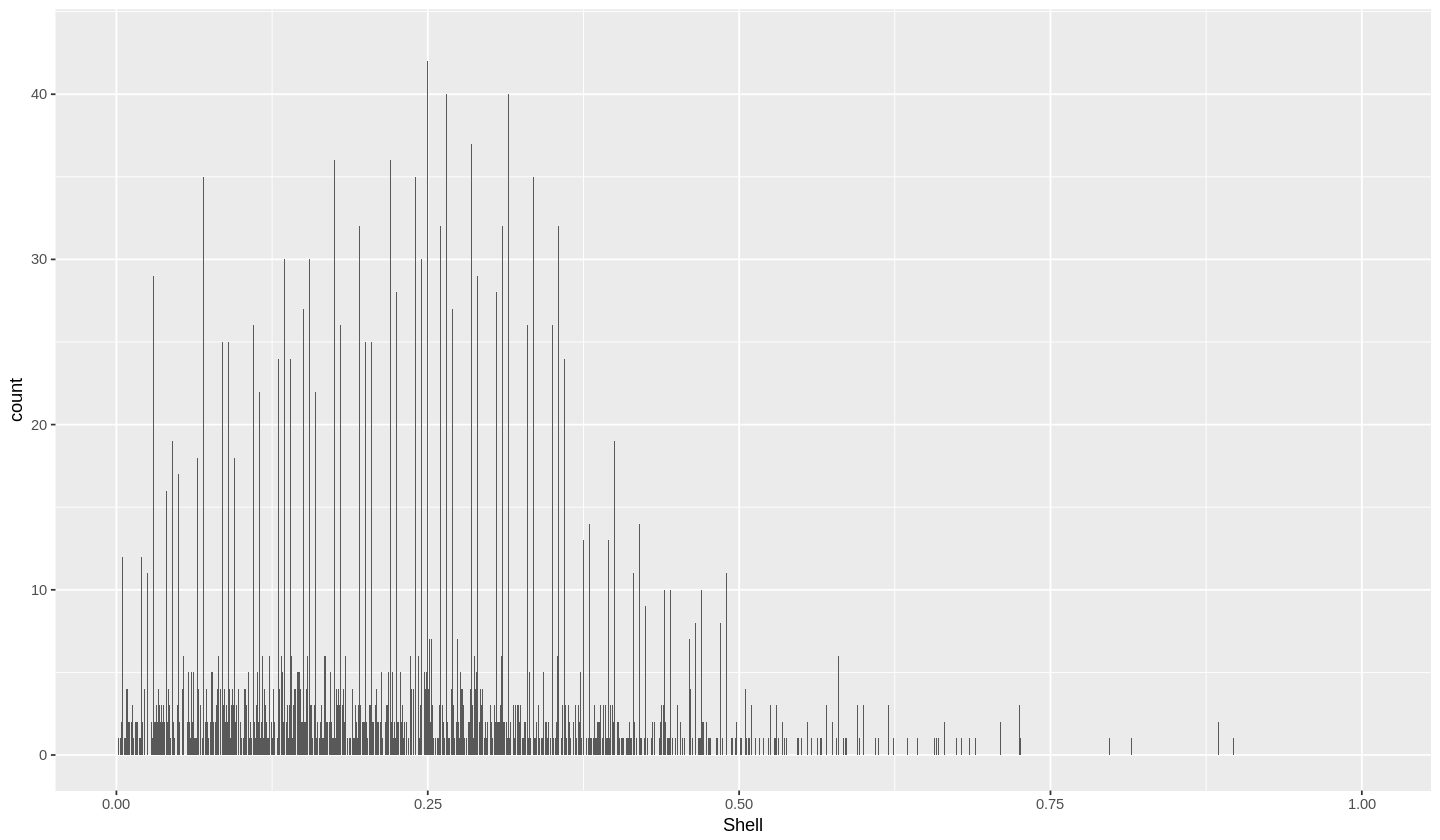

In [93]:
ggplot(AbData1, aes(x = Shell)) + geom_bar()

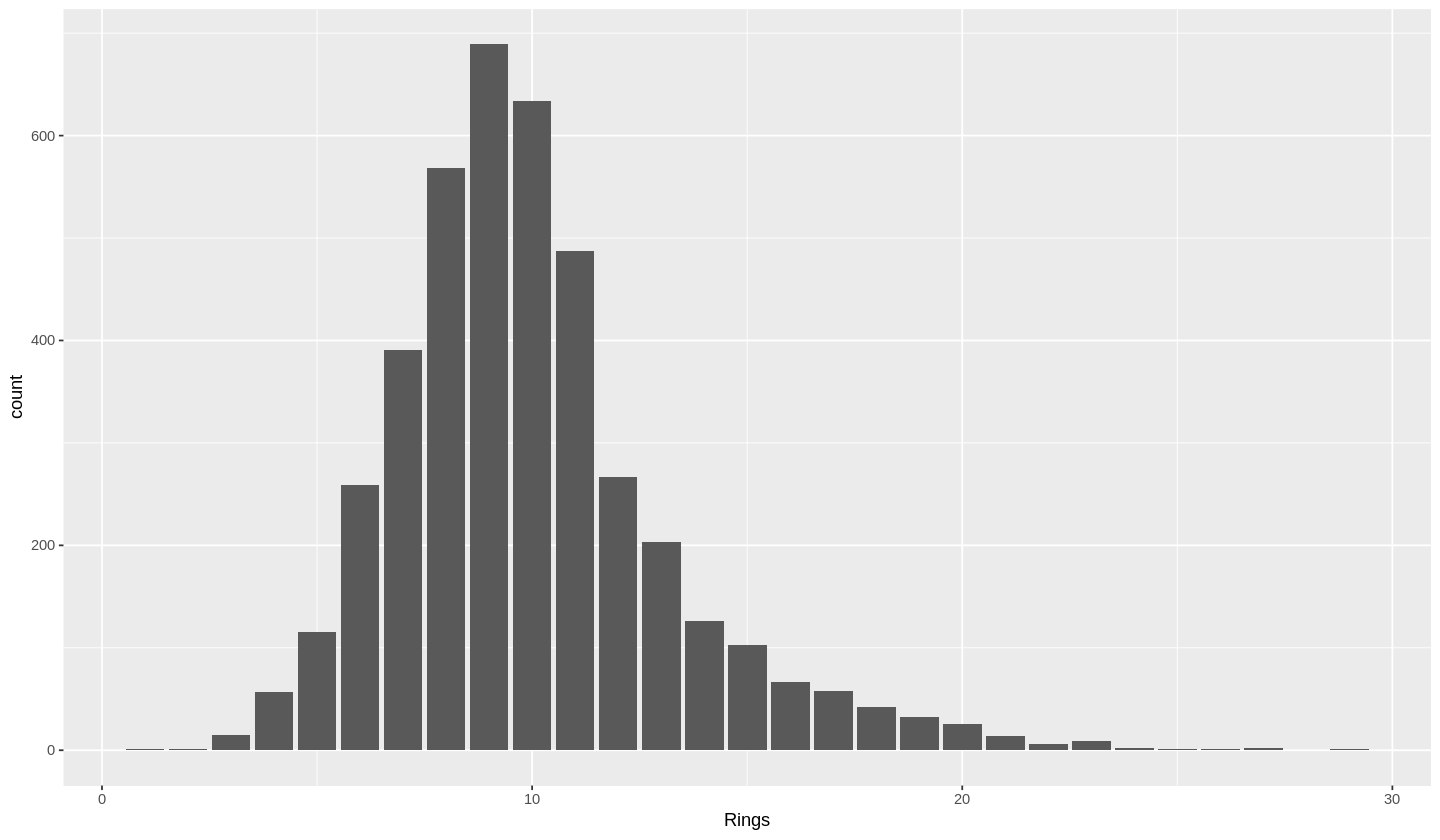

In [94]:
ggplot(AbData1, aes(x = Rings)) + geom_bar()

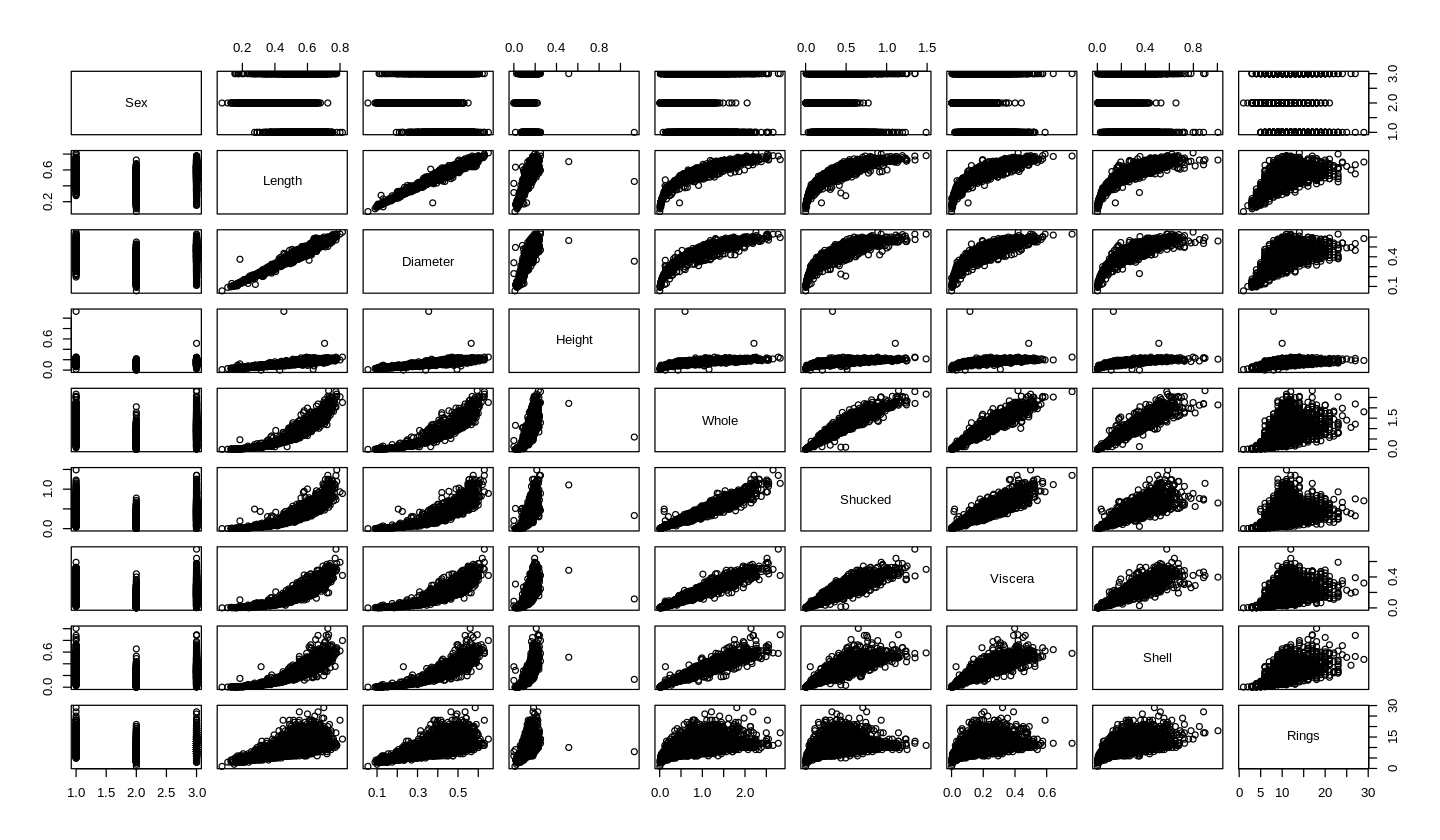

In [96]:
pairs(AbData1)

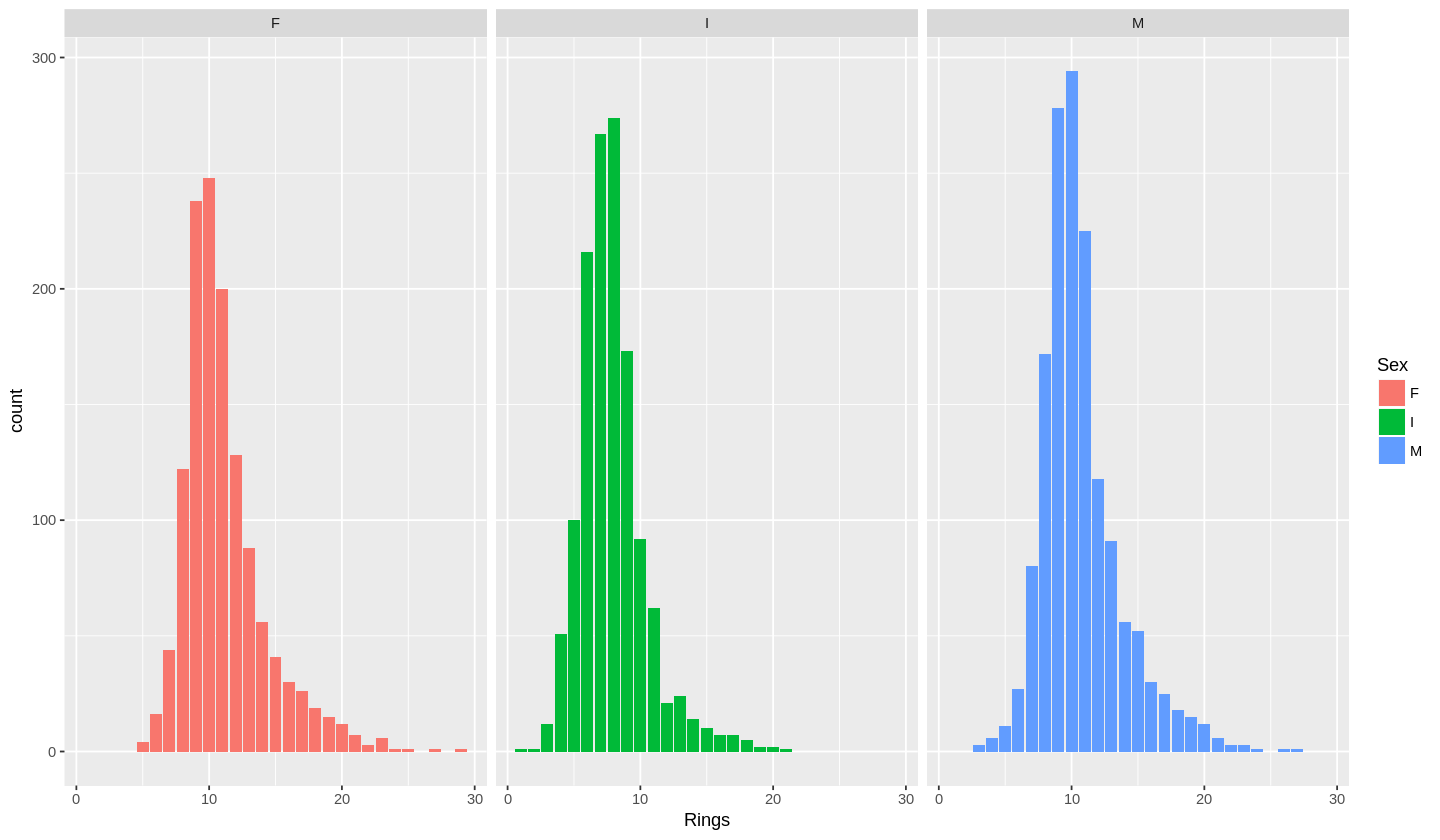

In [98]:
ggplot(AbData1) + aes(Rings, fill = Sex) + geom_bar(position = "stack") + facet_wrap(~Sex, ncol = 3)